In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
os.chdir(r"C:\Users\kaborg15\Python_projects\Vibrent_Style_Quiz_Generation")

import pandas as pd
from resources.constants import *
from src import load_dataframes

OUTFIT_EMBEDDINGS_DF_PATH = r"resources\data\outfit_embeddings_triplets_50_df.pkl"
REPRESENTATION_COLUMN = "outfit_embeddings"

pictures_df = pd.read_csv(PICTURE_TRIPLETS_CSV_PATH, sep=CSV_SEPARATOR)
user_triplets_df = pd.read_csv(USER_ACTIVITY_TRIPLETS_CSV_PATH, sep=CSV_SEPARATOR)

embeddings_df = pd.read_pickle(OUTFIT_EMBEDDINGS_DF_PATH)

In [4]:
import numpy as np

input_embeddings = np.stack(embeddings_df[REPRESENTATION_COLUMN].values)

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(input_embeddings, 'ward', metric='euclidean')




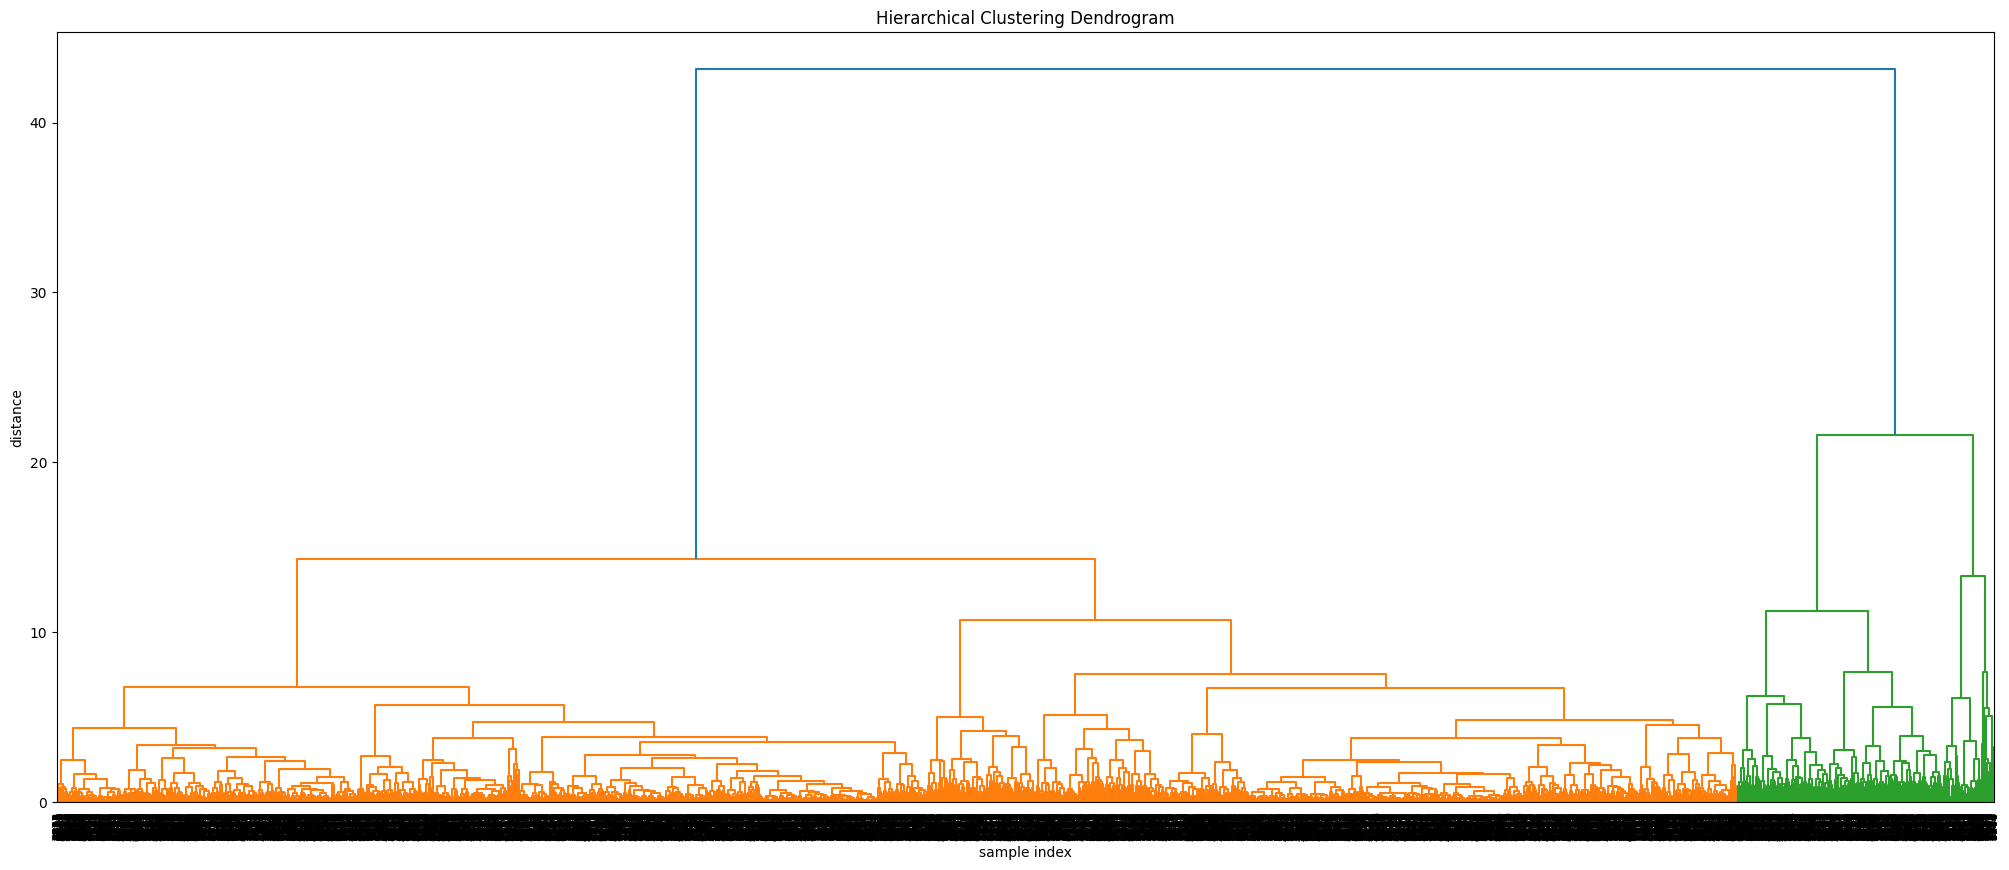

In [49]:

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [50]:
for row in Z:
    num_0, num_1, distance, num_2 = row
    if not num_0.is_integer() or not num_1.is_integer() or not num_2.is_integer():
        raise ValueError("Not integer")
    
    num_0, num_1, num_2 = int(num_0), int(num_1), int(num_2)
    print(f"{num_0} {num_1} {distance} {num_2}")

4224 5126 0.0 2
4140 5109 0.0 2
9408 9792 0.0 3
645 994 0.0 2
1363 6038 0.0 2
1817 1952 0.0 2
3627 9796 0.0 3
6544 9797 0.0 4
2774 9252 0.0 2
7664 8253 0.0 2
2922 4524 0.0 2
6355 7736 0.0 2
951 8983 0.0 2
559 4456 0.0 2
7553 9804 0.0 3
1273 8456 0.0 2
2732 9319 0.0 2
3414 3816 0.0 2
3979 9808 0.0 3
9013 9317 0.0 2
1018 2562 0.0 2
9458 9811 0.0 3
3537 8331 0.0 2
1292 4715 0.0 2
3544 4499 0.0 2
527 6573 0.0 2
2066 9097 0.0 2
422 8034 0.0 2
2945 4923 0.0 2
524 2979 0.0 2
3047 5599 0.0 2
1497 4918 0.0 2
561 4626 0.0 2
3379 6921 0.0 2
5404 5515 0.0 2
9359 9825 0.0 3
2958 6379 0.0 2
9496 9827 0.0 3
8541 9708 0.0 2
3914 9026 0.0 2
1090 1322 0.0 2
5915 6632 0.0 2
6603 8915 0.0 2
2222 5061 0.0 2
2402 5229 0.0 2
6307 8001 0.0 2
1733 3696 0.0 2
3961 8242 0.0 2
2455 2873 0.0 2
3828 9839 0.0 3
6758 9840 0.0 4
9760 9841 0.0 5
864 7054 0.0 2
7669 7917 0.0 2
2668 4991 0.0 2
6003 9845 0.0 3
2730 6670 0.0 2
8121 9847 0.0 3
1370 1884 0.0 2
3484 9849 0.0 3
4765 9850 0.0 4
1352 3588 0.0 2
5127 8320 0.0 2
2

In [51]:
import pandas as pd

z_df = pd.DataFrame(Z, columns=["num_0", "num_1", "distance", "num_2"])
z_df["num_0"].value_counts().sort_index()

num_0
0.0        1
1.0        1
2.0        1
3.0        1
4.0        1
          ..
19568.0    1
19569.0    1
19571.0    1
19576.0    1
19578.0    1
Name: count, Length: 9790, dtype: int64

In [52]:
z_df = z_df.astype({"num_0": int, "num_1": int, "distance": float, "num_2": int})

In [53]:
number_of_embeddings = input_embeddings.shape[0]
cluster_hierarchy = {i : [i] for i in range(number_of_embeddings)}

for index, row in z_df.iterrows():
    index_0, index_1, distance, number_in_cluster = row
    if index_0 in cluster_hierarchy and index_1 in cluster_hierarchy:
        new_cluster_index = number_of_embeddings + index
        cluster_hierarchy[new_cluster_index] = [cluster_hierarchy[index_0], cluster_hierarchy[index_1]]

def count_non_list_elements(nested_list):
    def flatten(lst):
        for item in lst:
            if isinstance(item, list):
                yield from flatten(item)
            else:
                yield item
    
    return sum(1 for _ in flatten(nested_list))


START_INDEX = 19580
NUM_TO_CONVERGENCE = 30
PRINT_CONVERGENCE = False
print(f"starting at index {START_INDEX} with {count_non_list_elements(cluster_hierarchy[START_INDEX])} elements")

current_level = 0
converged_clusters = []
investigate_indexes = [cluster_hierarchy[START_INDEX]]
while len(investigate_indexes) > 0:
    current_level += 1
    number_converged = 0
    print(f"level {current_level} with {len(investigate_indexes)} clusters")

    new_investigate_indexes = []
    for cluster in investigate_indexes:
        if len(cluster) != 2:
            raise ValueError(f"Reaced a leaf node? {cluster}")
        
        cluster_0, cluster_1 = cluster
        length_0 = count_non_list_elements(cluster_0)
        length_1 = count_non_list_elements(cluster_1)

        if length_0 > NUM_TO_CONVERGENCE:
            new_investigate_indexes.append(cluster_0)
        else:
            converged_clusters.append(cluster_0)
            number_converged += 1
            if PRINT_CONVERGENCE:
                print(f"found a cluster with {length_0} elements")
        
        if length_1 > NUM_TO_CONVERGENCE:
            new_investigate_indexes.append(cluster_1)
        else:
            converged_clusters.append(cluster_1)
            number_converged += 1
            if PRINT_CONVERGENCE:
                print(f"found a cluster with {length_1} elements")

    print(f"converged {number_converged} clusters")
    investigate_indexes = new_investigate_indexes

starting at index 19580 with 9791 elements
level 1 with 1 clusters
converged 0 clusters
level 2 with 2 clusters
converged 0 clusters
level 3 with 4 clusters
converged 0 clusters
level 4 with 8 clusters
converged 1 clusters
level 5 with 15 clusters
converged 2 clusters
level 6 with 28 clusters
converged 16 clusters
level 7 with 40 clusters
converged 26 clusters
level 8 with 54 clusters
converged 45 clusters
level 9 with 63 clusters
converged 62 clusters
level 10 with 64 clusters
converged 74 clusters
level 11 with 54 clusters
converged 59 clusters
level 12 with 49 clusters
converged 54 clusters
level 13 with 44 clusters
converged 53 clusters
level 14 with 35 clusters
converged 42 clusters
level 15 with 28 clusters
converged 34 clusters
level 16 with 22 clusters
converged 33 clusters
level 17 with 11 clusters
converged 17 clusters
level 18 with 5 clusters
converged 5 clusters
level 19 with 5 clusters
converged 7 clusters
level 20 with 3 clusters
converged 6 clusters


In [54]:
def flatten(lst):
    return [item for el in lst for item in (flatten(el) if isinstance(el, list) else [el])]

for cluster in converged_clusters:
    print(f"cluster with {count_non_list_elements(cluster)} elements")
    print(flatten(cluster))

cluster with 12 elements
[4770, 6598, 6866, 9519, 6984, 5344, 9738, 4535, 3677, 9148, 2091, 3608]
cluster with 25 elements
[7854, 5186, 6234, 5874, 821, 6313, 799, 5323, 1891, 3843, 5219, 7070, 2829, 3766, 5030, 8743, 2382, 4687, 7842, 7668, 8186, 5535, 2006, 23, 7791]
cluster with 3 elements
[8199, 3071, 4374]
cluster with 21 elements
[345, 1831, 4191, 6028, 6918, 5205, 6265, 1114, 4611, 4604, 4682, 9543, 7566, 8630, 9439, 862, 9120, 2138, 9476, 3801, 8747]
cluster with 23 elements
[9536, 5368, 7998, 5383, 2676, 8554, 1216, 9598, 6864, 1592, 5192, 8292, 2827, 554, 4016, 5821, 8995, 9574, 6385, 7399, 5939, 2708, 8677]
cluster with 20 elements
[4632, 3568, 8520, 430, 1762, 2258, 9169, 9282, 8222, 8356, 2300, 4226, 3067, 416, 5688, 6945, 212, 1348, 4352, 4812]
cluster with 12 elements
[815, 6606, 161, 8888, 7731, 9646, 8504, 4507, 7185, 163, 1259, 3334]
cluster with 16 elements
[5946, 8299, 8496, 8484, 8867, 6357, 7925, 28, 1134, 7171, 2670, 1108, 1426, 4576, 1171, 3254]
cluster with 19 

In [55]:
embeddings_df["cluster"] = -1
for i, cluster in enumerate(converged_clusters):
    flat_cluster = flatten(cluster)
    embeddings_df.loc[flat_cluster, "cluster"] = i



In [56]:
embeddings_df

group  \
0     group.00064a241ade73e6a5a7ad36327e4e83   
1     group.000957e12deba05e437a5e9726e8002c   
2     group.000aad5ac8cfefd8063ee16f6f57b2c1   
3     group.00136735b2578e9c5d3264375b6f4804   
4     group.00177dcb8a3afabaa5f899443a92154d   
...                                      ...   
9786  group.ffe3a5c7cf5d53385d918d7175ac9a80   
9787  group.ffeff24c94e027a51e16911c18f794e1   
9788  group.fff31ad62d72e66b266a91c0ddbcab9a   
9789  group.fff7f55797359a68d243738c2e3825dc   
9790  group.fffaf834a25fe349be65d2b1b69418c8   

                                           id  \
0     outfit.d138f31106ac442f9b2e0fe163597405   
1                     outfit.93826cc51216dcd0   
2     outfit.edbe38fccd174c3cac918d1347b7811e   
3     outfit.5c8d69783c04405081f121d327123521   
4                     outfit.92a9f025465bd509   
...                                       ...   
9786  outfit.b1aa45faec994c2bbad4d58e988b3f2e   
9787  outfit.a9b993b2778245f980708ccbe34257f4   
9788  outfit.ab807f73b03d461281444abe939dbf81   
9789  outfit.a63d74a774f54bb68669712adff310b0   
9790  outfit.8776f5d660d948c9bf3243220d6b1f16   

                                     name  \
0                        New Justine Coat   
1                     Sophisticated Dress   
2     Prenestina Jacket Baby Blue Jacket    
3                          ZWNo01 Sweater   
4            Out of stock - Latonia Dress   
...                                   ...   
9786                 Hooded Sweater Dress   
9787       Devore Kaftan Maxi Dress Black   
9788                Woven Fantasia Blazer   
9789     Kerstin Vanilla Custard Cardigan   
9790         Artsy Empreinte Monogram Bag   

                                            description  \
0     The Justine Coat features a high neck, a hidde...   
1     This dress is perfect for a summer night out w...   
2     Super elegant, constructed jacket with puffed ...   
3     ZWNo1 is a chunky hand-knit sweater from Bernt...   
4     HAR BLITT HENTET AV EIER 03.09.2017.\nSKAL IKK...   
...                                                 ...   
9786  A cozy hooded sweater dress from IBEN. The dre...   
9787  Fall in love under the sun and stay fabulous i...   
9788  The Armani Woven Fantasia Blazer is designed w...   
9789  The Kerstin cardigan is a super cosy, loosely ...   
9790  This elegant and stylish leather bag features ...   

                                      owner             timeCreated  \
0     user.3b5555d48f6b473f8e58956aadc0e21f 2021-10-01 10:48:04.675   
1     user.15bee69d2f1541d785eee3f047ec5cf9 2017-05-08 13:28:30.000   
2     user.0cc54cbd6fa246599239e9adce341264 2022-03-28 13:54:38.895   
3     user.b62e7bd166424c819a2501d83b28b037 2024-01-18 05:23:19.035   
4                     user.a00e19bc644fb8f2 2017-02-13 16:31:31.000   
...                                     ...                     ...   
9786  user.b0485ebe4a4b46ccb68cbe187fe101df 2023-02-13 08:33:43.949   
9787  user.7582d79bd1554bd89edcbc1d72e1d1f5 2023-02-28 10:25:33.716   
9788  user.8b398e589b2443bf9a30d92866cac1ce 2023-08-09 10:42:57.419   
9789  user.66d3a17f5dd149f1845bbaf223c67cc3 2021-05-28 14:50:19.732   
9790  user.4badce9cc5dd4014bef7409db4c2f830 2018-11-13 13:15:52.000   

     retailPrice         meta.validTo  \
0      3500.0000  9999-01-01 00:00:00   
1     10000.0000  9999-01-01 00:00:00   
2      2500.0000  9999-01-01 00:00:00   
3      6170.0000  9999-01-01 00:00:00   
4      6500.0000  9999-01-01 00:00:00   
...          ...                  ...   
9786   1100.0000  9999-01-01 00:00:00   
9787   2200.0000  9999-01-01 00:00:00   
9788   9700.0000  9999-01-01 00:00:00   
9789   2600.0000  9999-01-01 00:00:00   
9790  30000.0000  9999-01-01 00:00:00   

                                            outfit_tags  \
0     [Synthetic, Multi Season, Everyday, Day Birger...   
1     [Fall, Dresses, XS, Prada, Grey, Women, Business]   
2     [Cotton, C.L.E.A.N by Christina Ledang, Viscos...   
3     [Wool, Winter, Purple, L, Knitwear,

c:\Users\kaborg15\AppData\Local\anaconda3\envs\style_quiz_3.10\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kaborg15\AppData\Local\anaconda3\envs\style_quiz_3.10\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


No. of other points: 9615
No. of category points: 176


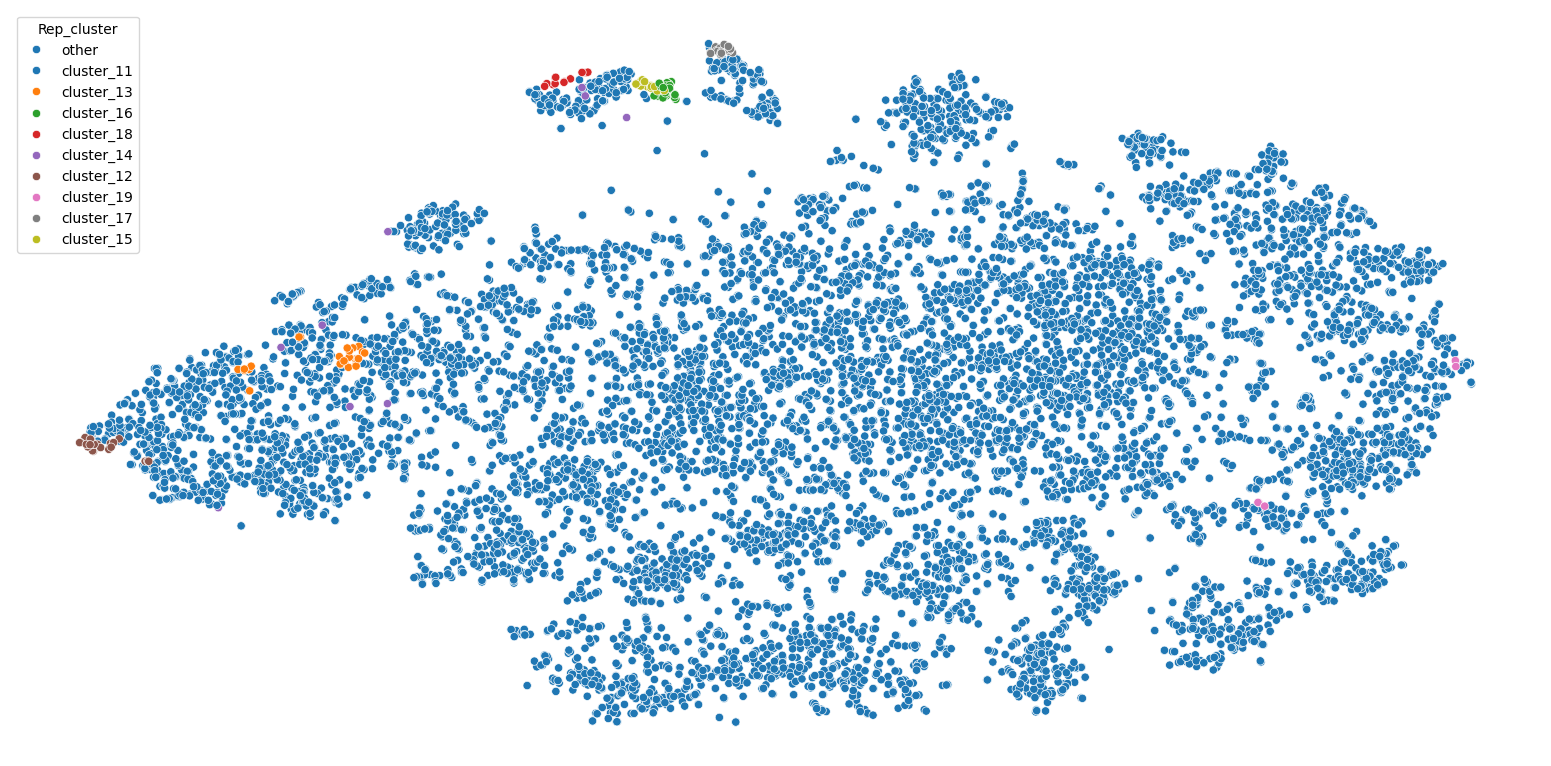

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from src import generate_embedding_tsnes_with_thumbnails

FIGURE_SAVE_PATH = "reports/figures/outfit_tsne.png"

embeddings_df["rep_cluster"] = embeddings_df["cluster"].apply(lambda x: f"cluster_{x}" if 10 < x < 20 else "other")
tsne_original_df, scatter_original_plot, tsne = generate_embedding_tsnes_with_thumbnails.generate_tsne_diagram(embeddings_df, REPRESENTATION_COLUMN, hue_column="rep_cluster", show_plot=True, return_tsne=True, save_path=FIGURE_SAVE_PATH)

In [7]:
cluster_mean_dict = {cluster_num: None for cluster_num in embeddings_df["cluster"].unique()}
for cluster_num in cluster_mean_dict:
    cluster_embeddings = np.stack(embeddings_df[embeddings_df["cluster"] == cluster_num][REPRESENTATION_COLUMN].values)
    cluster_mean_dict[cluster_num] = cluster_embeddings.mean(axis=0)

COLUMN_NAMES = ["id", "cluster", REPRESENTATION_COLUMN, "rep_cluster", "marked"]
dataframe_list = []
for i, (key, value) in enumerate(cluster_mean_dict.items()):
    dataframe_list.append([f"mean_embedding_{i}", key, value, f"cluster_{key}", True])
    
mean_embeddings_df = pd.DataFrame(dataframe_list, columns=COLUMN_NAMES)
embeddings_with_mean_df = embeddings_df.copy()
embeddings_with_mean_df["marked"] = False
embeddings_with_mean_df = pd.concat([embeddings_with_mean_df, mean_embeddings_df]).reset_index(drop=True)

No. of other points: 9611
No. of category points: 180
No. of other points: 527
No. of category points: 9


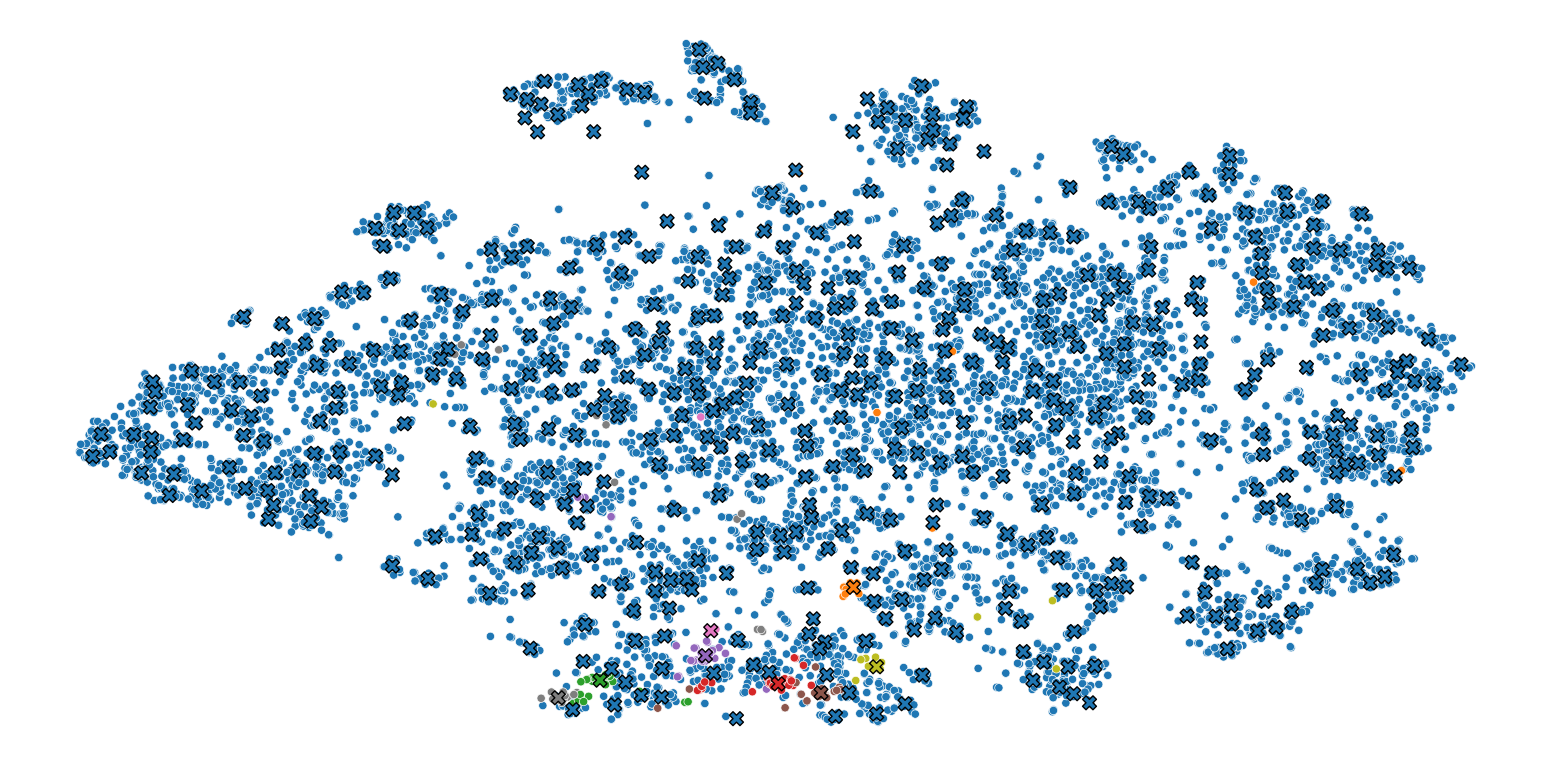

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from src import generate_embedding_tsnes_with_thumbnails

FIGURE_SAVE_PATH = "reports/figures/outfit_tsne.png"

embeddings_with_mean_df["rep_cluster"] = embeddings_with_mean_df["cluster"].apply(lambda x: f"cluster_{x}" if 200 < x < 210 else "other")
tsne_df, scatter_plot, tsne = generate_embedding_tsnes_with_thumbnails.generate_tsne_diagram(embeddings_with_mean_df, REPRESENTATION_COLUMN, legend=False, mark_column="marked", hue_column="rep_cluster", show_plot=True, return_tsne=True, save_path=FIGURE_SAVE_PATH)

No. of other points: 9615
No. of category points: 176


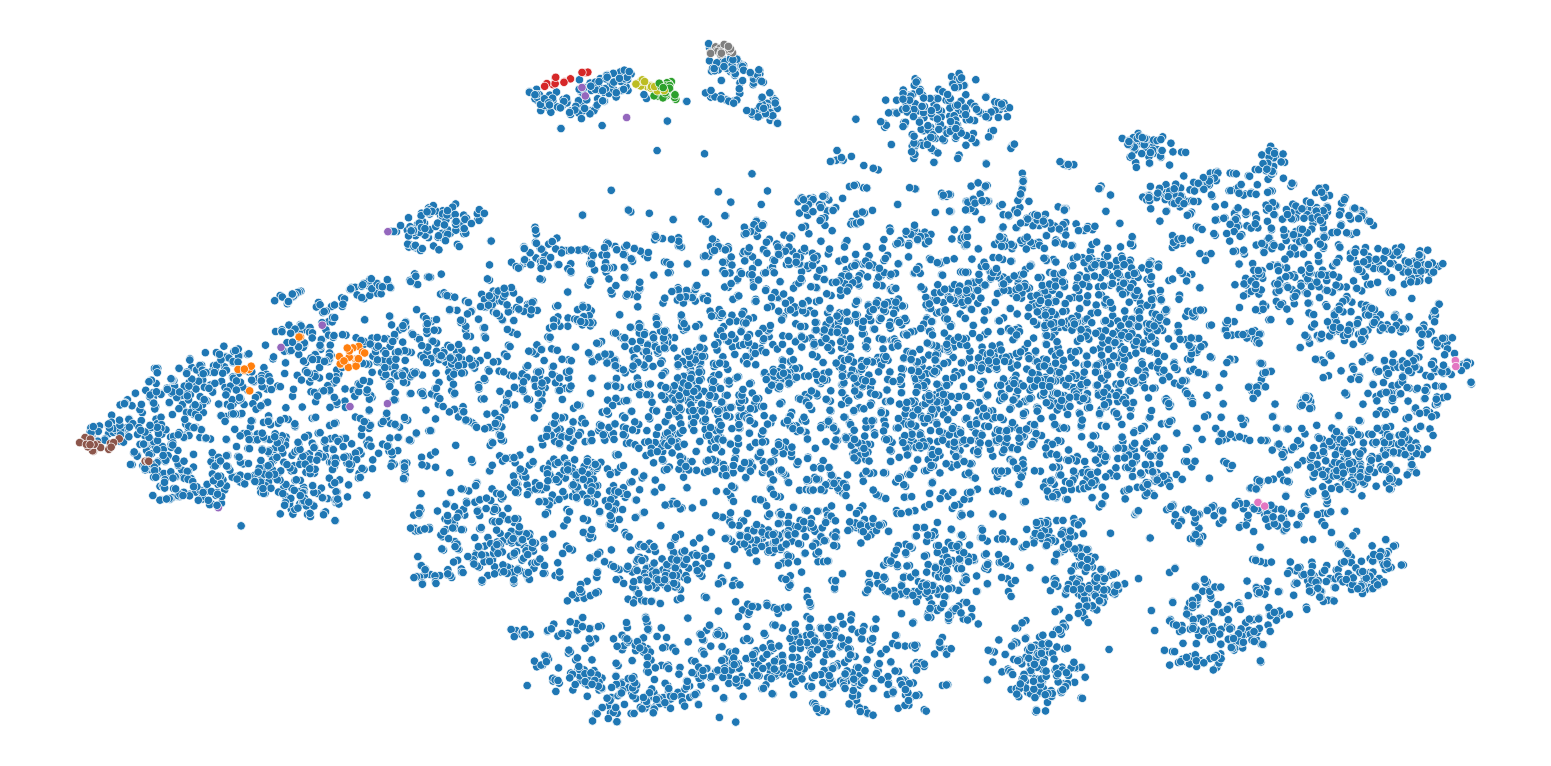

In [55]:
tsne_df, scatter_plot, tsne = generate_embedding_tsnes_with_thumbnails.generate_tsne_diagram(embeddings_df, REPRESENTATION_COLUMN, hue_column="rep_cluster", legend=False, show_plot=True, return_tsne=True, save_path=FIGURE_SAVE_PATH)

In [33]:
#tsne_df["draw_thumbnail"] = tsne_df.apply(lambda x: x["rep_cluster"].startswith("cluster") and not x["marked"], axis=1)

In [56]:
tsne_df["cluster"] = embeddings_df["cluster"]
tsne_df = tsne_df.dropna(subset=["lead_picture_id"]).copy()
tsne_df["cum_cluster_num"] = tsne_df.groupby("cluster").cumcount()
tsne_df["draw_thumbnail"] = tsne_df.apply(lambda x: x["cum_cluster_num"] == 0, axis=1)

0it [00:00, ?it/s]

Error while pasting thumbnail resources\data\dataset\images\picture.df94ca2ef38e4f8fa2a830d883a54fbb on image: cannot identify image file 'C:\\Users\\kaborg15\\Python_projects\\Vibrent_Style_Quiz_Generation\\resources\\data\\dataset\\images\\picture.df94ca2ef38e4f8fa2a830d883a54fbb'


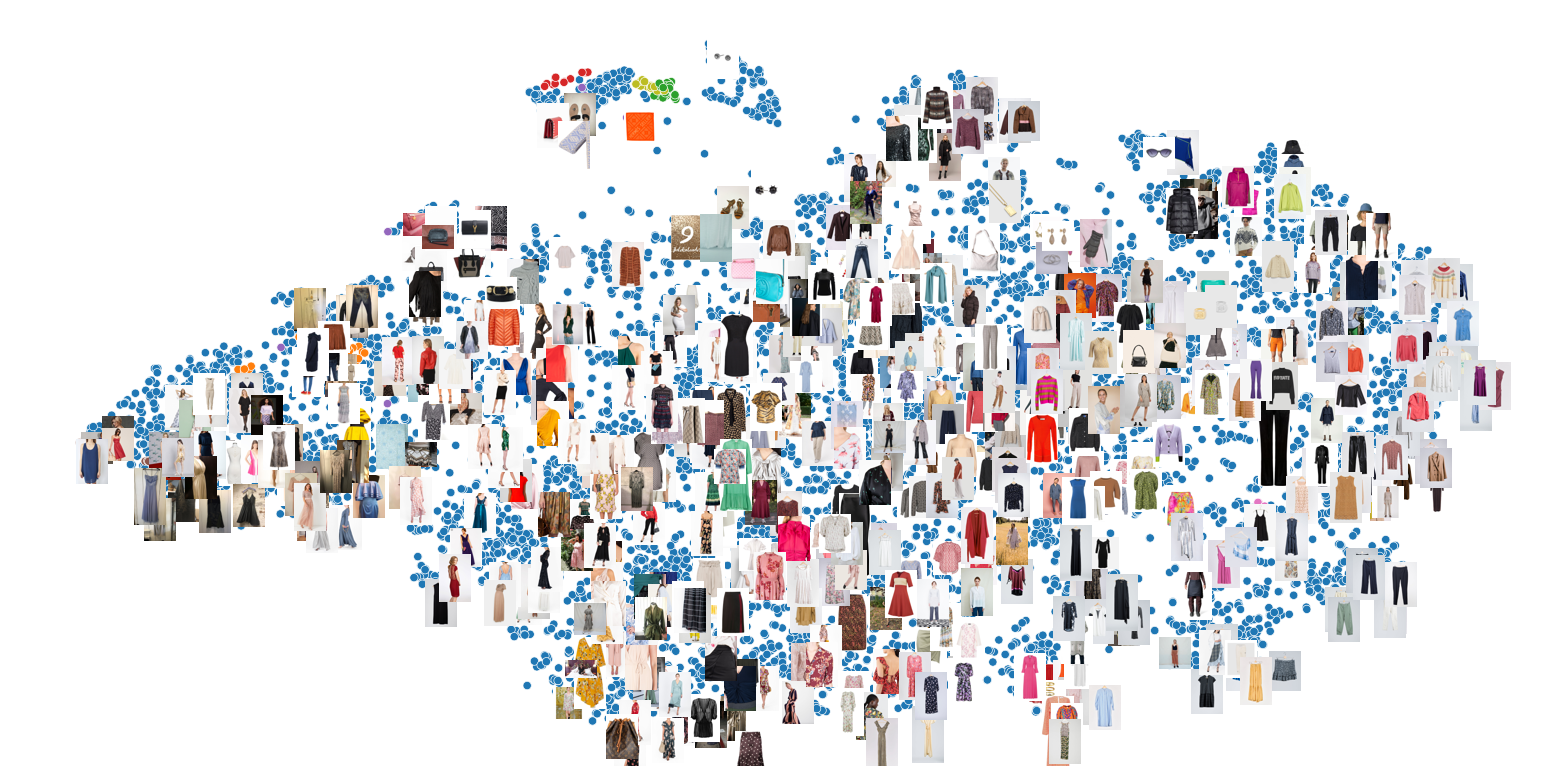

In [57]:
image_with_thumbnails = generate_embedding_tsnes_with_thumbnails.draw_thumbnails_on_scatter_plot(scatter_plot, tsne_df, mark_column="draw_thumbnail")
image_with_thumbnails

0it [00:00, ?it/s]

Error while pasting thumbnail resources\data\dataset\images\picture.df94ca2ef38e4f8fa2a830d883a54fbb on image: cannot identify image file 'C:\\Users\\kaborg15\\Python_projects\\Vibrent_Style_Quiz_Generation\\resources\\data\\dataset\\images\\picture.df94ca2ef38e4f8fa2a830d883a54fbb'
Error while pasting thumbnail resources\data\dataset\images\picture.f00e740996384fd69e3842cdf507f19d on image: cannot identify image file 'C:\\Users\\kaborg15\\Python_projects\\Vibrent_Style_Quiz_Generation\\resources\\data\\dataset\\images\\picture.f00e740996384fd69e3842cdf507f19d'


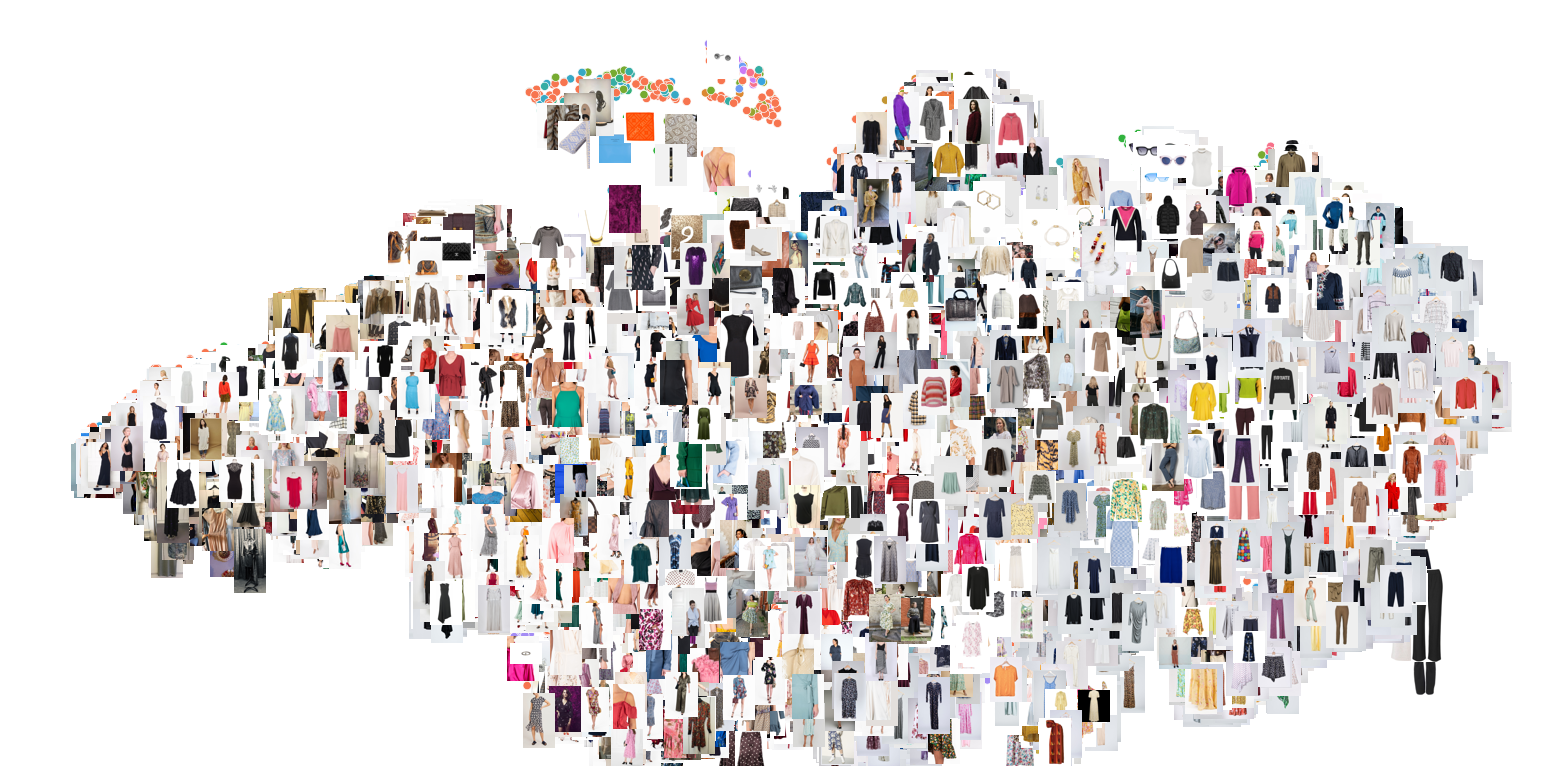

In [22]:
image_with_thumbnails = generate_embedding_tsnes_with_thumbnails.draw_thumbnails_on_scatter_plot(scatter_plot, tsne_df, num_thumbnails=-1)

image_with_thumbnails